In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 21.3 MB/s eta 0:00:00


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
import os 
import cv2
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from ultralytics import YOLO
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
from ultralytics import YOLO
from ultralytics.models.v8 import *
model_path = '/content/drive/MyDrive/Demo/runs/detect/train2/weights/best.pt'
model = YOLO(model=model_path, task='detect')  # load a pretrained model (recommended for training)

In [ ]:

from ultralytics import YOLO
from ultralytics.models.v8 import *

# Load a model
model = YOLO(model='yolov8m.pt', task='detect')  # load a pretrained model (recommended for training)


# Train the model
model.train(data='dataset.yaml', epochs=10, imgsz=600)


Ultralytics YOLOv8.0.99 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=dataset.yaml, epochs=10, patience=50, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspac

In [ ]:
!cp -r runs /content/drive/MyDrive/Demo


0: 384x608 1 Top Hook, 1 Bottom Hool, 25.7ms
Speed: 2.7ms preprocess, 25.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 608)


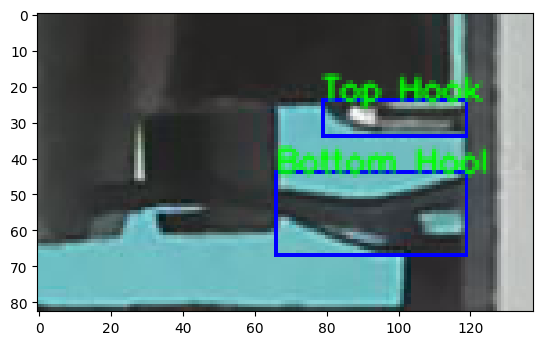

In [50]:
import os 

image_folder_path = '/content/drive/MyDrive/Demo/Detect_Motor/UI/mydata/hook'
# image_folder_path = '/content/drive/MyDrive/Demo/HookData/train/images'
image_names = os.listdir(image_folder_path)

# image_path = os.path.join(image_folder_path, image_names[9])
image_path = os.path.join(image_folder_path, 'hook_good_150.png')
image = cv2.imread(image_path)
original_image_shape = image.shape
predicted_image = image
image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
result = model.predict(image[:,:,::-1], imgsz=608, conf=0.5)
predicted_boxes = result[0].boxes
predicted_probs = result[0].probs

for index in range(0, predicted_boxes.xyxyn.shape[0]):
  width = original_image_shape[0]
  heigth = original_image_shape[1]
  start_point = predicted_boxes.xyxyn[index].cpu().numpy()[0:2]
  end_point = predicted_boxes.xyxyn[index].cpu().numpy()[2:]
  start_point[0] = start_point[0] * heigth
  end_point[0] = end_point[0] * heigth
  start_point[1] = start_point[1] * width
  end_point[1] = end_point[1] * width

  predicted_image = cv2.rectangle(predicted_image, start_point.astype(int).tolist(), end_point.astype(int).tolist(), (0, 0, 255), 1)
  predicted_image = cv2.putText(predicted_image, f'{result[0].names[int(predicted_boxes.cls[index])]}', start_point.astype(int).tolist(), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1, cv2.LINE_AA)
 

plt.imshow(predicted_image)



# cv2.rectangle(predicted_image, start_point, end_point, color, thickness)


In [37]:
predicted_boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[ 79.4608,  24.9600, 119.1636,  34.4354,   0.7640,   0.0000],
        [ 66.1519,  44.8466, 119.2811,  67.5135,   0.7325,   1.0000]], device='cuda:0')
cls: tensor([0., 1.], device='cuda:0')
conf: tensor([0.7640, 0.7325], device='cuda:0')
data: tensor([[ 79.4608,  24.9600, 119.1636,  34.4354,   0.7640,   0.0000],
        [ 66.1519,  44.8466, 119.2811,  67.5135,   0.7325,   1.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: tensor([ 83, 138], device='cuda:0')
shape: torch.Size([2, 6])
xywh: tensor([[99.3122, 29.6977, 39.7027,  9.4753],
        [92.7165, 56.1801, 53.1292, 22.6669]], device='cuda:0')
xywhn: tensor([[0.7197, 0.3578, 0.2877, 0.1142],
        [0.6719, 0.6769, 0.3850, 0.2731]], device='cuda:0')
xyxy: tensor([[ 79.4608,  24.9600, 119.1636,  34.4354],
        [ 66.1519,  44.8466, 119.2811,  67.5135]], device='cuda:0')
xyxyn: tensor([[0.5758, 0.3007, 0.8635, 0.4149],
        [0.4794, 0.5403,

In [42]:
result

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'Top Hook', 1: 'Bottom Hool'}
 orig_img: array([[[ 55,  57,  57],
         [ 55,  57,  57],
         [ 54,  56,  56],
         ...,
         [191, 194, 189],
         [191, 194, 189],
         [191, 194, 189]],
 
        [[ 55,  57,  57],
         [ 55,  57,  57],
         [ 54,  56,  56],
         ...,
         [191, 194, 189],
         [191, 194, 189],
         [191, 194, 189]],
 
        [[ 55,  57,  57],
         [ 55,  57,  57],
         [ 54,  56,  56],
         ...,
         [191, 194, 189],
         [191, 194, 189],
         [191, 194, 189]],
 
        ...,
 
        [[199, 196, 117],
         [201, 198, 118],
         [205, 203, 122],
         ...,
         [191, 196, 195],
         [191, 196, 195],
         [191, 196, 195]],
 
        [[129, 124,  67],
         [132, 127,  69],
         [141, 135,  7